In [1]:
#import Libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
from sklearn.datasets import make_blobs
import csv
from sklearn.decomposition import PCA

In [2]:
savings_df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Week5\mini-project-III\mini-project-III\Datafiles\twm_savings_acct.csv", sep=';')
# clean data by generating new column to look at savings
savings_df['total_saved'] = savings_df['ending_balance'] - savings_df['starting_balance']
# filter out inactive bank accounts
active_filter = savings_df['account_active'] == 'Y '
# build bank behaviour df for each customer with savings acct
bank_bhv = savings_df[active_filter][['cust_id','acct_nbr','total_saved']]


In [3]:
savings_df

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,total_saved
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,351.24
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,174.73
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,211.08
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,-73.71


In [4]:
credit_df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Week5\mini-project-III\mini-project-III\Datafiles\twm_credit_acct.csv", sep=';')
# clean data by generating new column to look at debt
credit_df['total_debt'] = credit_df['ending_balance'] - credit_df['starting_balance']
# filter out inactive bank accounts
active_filter = credit_df['account_active'] == 'Y '
# join cc accts into customer listing with savings accts
bank_bhv = bank_bhv.merge(credit_df[active_filter][['cust_id','acct_nbr','total_debt']], 
                          left_on='cust_id', right_on='cust_id', how='left')
# if customers only have 1/2 accounts, fill NaN with 0
bank_bhv = bank_bhv.fillna(0)


# rename appropriate columns for ease of reference
bank_bhv = bank_bhv.rename(columns={'acct_nbr_x':'savings_acct',
                         'acct_nbr_y':'credit_acct'})

In [5]:
bank_bhv

,cust_id,savings_acct,total_saved,credit_acct,total_debt
0,1363160,13631603,9.50,4.561143e+15,-370.77
1,1362548,13625483,3.78,4.561143e+15,-6896.57
2,1362752,13627523,9.07,0.000000e+00,0.00
3,1362609,13626093,-709.02,4.561143e+15,1224.93
4,1363465,13634653,17.44,0.000000e+00,0.00
...,...,...,...,...,...
370,1363141,13631413,351.24,0.000000e+00,0.00
371,1363038,13630383,174.73,4.561143e+15,1800.00
372,1362529,13625293,211.08,0.000000e+00,0.00
373,1362895,13628953,-73.71,4.561143e+15,1300.00


In [6]:
trans_df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Week5\mini-project-III\mini-project-III\Datafiles\twm_transactions.csv", sep=';')
# adding extra column to make multiple agg func on tran_amt column
trans_df['tran_avg'] = trans_df['tran_amt']
# cleaning data to produce anticipated info
trans_df = trans_df[['acct_nbr','tran_avg','tran_amt','tran_id']].groupby('acct_nbr').agg({'tran_avg':'mean','tran_amt':'sum','tran_id':'count'})
trans_df = trans_df.rename(columns={'tran_amt':'tran_sum','tran_id':'tran_count'})
# merging twice for each account type to receive saving tran and cc trans, respectively
bank_bhv = bank_bhv.merge(trans_df, left_on='savings_acct', right_on='acct_nbr', how='inner')
bank_bhv = bank_bhv.merge(trans_df, left_on='credit_acct', right_on='acct_nbr', how='inner')

# column clean-up for ease of reference
bank_bhv = bank_bhv.rename(columns={
    'tran_avg_x':'sav_tran_avg',
    'tran_avg_y':'cc_tran_avg',
    'tran_sum_x':'sav_tran_sum',
    'tran_sum_y':'cc_tran_sum',
    'tran_count_x':'sav_tran_count',
    'tran_count_y':'cc_tran_count'})

In [8]:
bank_bhv

,cust_id,savings_acct,total_saved,credit_acct,total_debt,sav_tran_avg,sav_tran_sum,sav_tran_count,cc_tran_avg,cc_tran_sum,cc_tran_count
0,1363160,13631603,9.50,4.561143e+15,-370.77,0.197917,9.50,48,5.588676,380.03,68
1,1362548,13625483,3.78,4.561143e+15,-6896.57,0.315000,3.78,12,317.147727,6977.25,22
2,1362609,13626093,-709.02,4.561143e+15,1224.93,-22.854194,-708.48,31,-19.870455,-874.30,44
3,1363078,13630783,468.57,4.561143e+15,-1238.14,18.053077,469.38,26,26.281400,1314.07,50
4,1362588,13625883,-242.53,4.561143e+15,546.55,-7.349394,-242.53,33,-9.502407,-513.13,54
...,...,...,...,...,...,...,...,...,...,...,...
230,1363385,13633853,1215.74,4.561143e+15,-834.47,39.217419,1215.74,31,22.268947,846.22,38
231,1363284,13632843,-593.23,4.561143e+15,132.98,-19.116129,-592.60,31,-3.277027,-121.25,37
232,1362508,13625083,133.47,4.561143e+15,260.21,4.044545,133.47,33,-2.067816,-179.90,87
233,1363038,13630383,174.73,4.561143e+15,1800.00,5.300303,174.91,33,-72.552917,-1741.27,24


In [7]:
customer_df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Week5\mini-project-III\mini-project-III\Datafiles\twm_customer.csv", sep=';')
# Only filtering by columns I want to pursue, largely income
customer_df = customer_df[['cust_id','income']]
# merge with customer id to obtain income per row of customer
bank_bhv = bank_bhv.merge(customer_df, left_on='cust_id', right_on='cust_id', how='left')

In [8]:
bank_bhv

,cust_id,savings_acct,total_saved,credit_acct,total_debt,sav_tran_avg,sav_tran_sum,sav_tran_count,cc_tran_avg,cc_tran_sum,cc_tran_count,income
0,1363160,13631603,9.50,4.561143e+15,-370.77,0.197917,9.50,48,5.588676,380.03,68,18548
1,1362548,13625483,3.78,4.561143e+15,-6896.57,0.315000,3.78,12,317.147727,6977.25,22,44554
2,1362609,13626093,-709.02,4.561143e+15,1224.93,-22.854194,-708.48,31,-19.870455,-874.30,44,1929
3,1363078,13630783,468.57,4.561143e+15,-1238.14,18.053077,469.38,26,26.281400,1314.07,50,9622
4,1362588,13625883,-242.53,4.561143e+15,546.55,-7.349394,-242.53,33,-9.502407,-513.13,54,6354
...,...,...,...,...,...,...,...,...,...,...,...,...
230,1363385,13633853,1215.74,4.561143e+15,-834.47,39.217419,1215.74,31,22.268947,846.22,38,2314
231,1363284,13632843,-593.23,4.561143e+15,132.98,-19.116129,-592.60,31,-3.277027,-121.25,37,36614
232,1362508,13625083,133.47,4.561143e+15,260.21,4.044545,133.47,33,-2.067816,-179.90,87,9802
233,1363038,13630383,174.73,4.561143e+15,1800.00,5.300303,174.91,33,-72.552917,-1741.27,24,36605


In [9]:
bank_bhv.drop(columns=[
    'cust_id','savings_acct','credit_acct'], inplace=True)
bank_bhv.head()

,total_saved,total_debt,sav_tran_avg,sav_tran_sum,sav_tran_count,cc_tran_avg,cc_tran_sum,cc_tran_count,income
0,9.50,-370.77,0.197917,9.50,48,5.588676,380.03,68,18548
1,3.78,-6896.57,0.315000,3.78,12,317.147727,6977.25,22,44554
2,-709.02,1224.93,-22.854194,-708.48,31,-19.870455,-874.30,44,1929
3,468.57,-1238.14,18.053077,469.38,26,26.281400,1314.07,50,9622
4,-242.53,546.55,-7.349394,-242.53,33,-9.502407,-513.13,54,6354


In [10]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
bank_bhv_sc = scaler.fit_transform(bank_bhv)

In [11]:
bank_bhv_sc

array([[-0.38040547, -0.34251622, -0.41453838, ...,  0.30399875,
         1.12573716, -0.16995058],
       [-0.38781565, -3.83605531, -0.40981213, ...,  3.82605941,
        -0.97929981,  1.10284136],
       [-1.31123837,  0.51173006, -1.34507272, ..., -0.36565095,
         0.027457  , -0.9833217 ],
       ...,
       [-0.21980402, -0.00472571, -0.25926322, ...,  0.00506868,
         1.99520895, -0.59799943],
       [-0.16635225,  0.81958956, -0.20857261, ..., -0.82850059,
        -0.88777646,  0.71379948],
       [-0.4882029 ,  0.55191823, -0.52879256, ..., -0.5861768 ,
        -0.75049144,  0.21370765]])

c:\Users\zarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


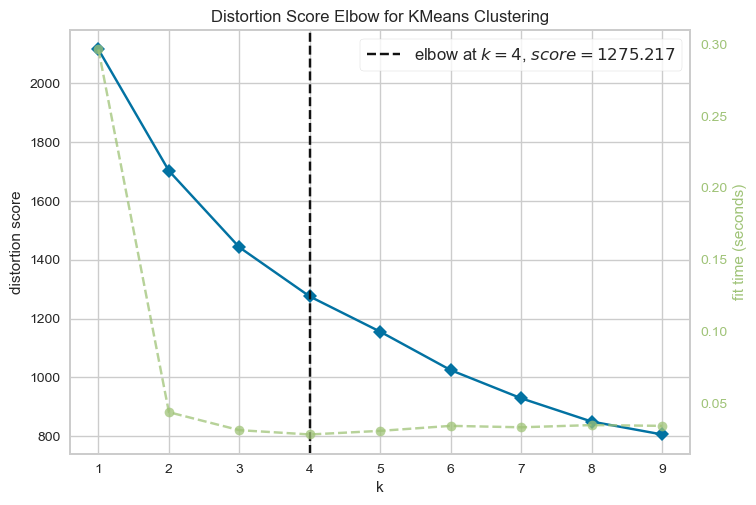

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Plotting Elbow Curve
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(bank_bhv_sc)    
visualizer.poof()

In [13]:
# KMeans of dataset
kmeans= KMeans(n_clusters=2, random_state=0)
kmeans.fit(bank_bhv_sc)
k_labels = kmeans.labels_
new_columns = kmeans.predict(bank_bhv_sc)
clusters = pd.DataFrame(new_columns)

In [14]:
# MinMax Scalar to bring all data onto relative 0-5 scale
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(bank_bhv)
bank_bhv_mnmx = pd.DataFrame(minmax_df,columns=bank_bhv.columns.to_list())

In [15]:
bank_bhv_df = pd.concat([bank_bhv_mnmx, clusters], axis=1)
bank_bhv_df.rename(columns={0:'cluster'}, inplace=True)

In [16]:
df_radar = bank_bhv_df.groupby('cluster').mean().divide(bank_bhv_df.drop('cluster',axis=1).mean())
#df_radar = bank_bhv_df.groupby('cluster').mean()

In [17]:
import plotly.graph_objects as go

categories = df_radar.columns.to_list()
fig = go.Figure()

i=0
for index, series in df_radar.iterrows():
    r = []
    r.append(series.values)
    
    fig.add_trace(go.Scatterpolar(
        r=r[0],
        theta=categories,
        fill='toself',
        name=f'Cluster {i}'))
    i+=1

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=True)
#fig.layout.polar.angularaxis.type="category" # more imperative style

fig.show()